# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from datetime import datetime, timedelta

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Connect to Azure Machine Learning Service workspace

In [2]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config(path="../src_aml")

WARNING - Note, we have launched a browser for you to login. For old experience with device code, use "az login --use-device-code"


Performing interactive authentication. Please follow the instructions on the terminal.


WARNING - You have logged in. Now let us find all the subscriptions to which you have access...


Interactive authentication successfully completed.


## Get latest run

In [3]:
from azureml.core import Experiment

experiment = Experiment(ws, "Data_Preparation_Pipeline")

latest_completed_run = None
for run in experiment.get_runs():
    if run.get_status() == "Finished":
        latest_completed_run = run
        break

## Pipeline steps outputs

### Ingest step - output

### Clean step - output

#### Download latest dataset 

In [4]:
data_filename = "cleaning_output_pipeline_data"
download_location_base = os.path.join("..", "data", "interim", "after_cleaning")

In [5]:
# Retrieve the last step
last_step = latest_completed_run.find_step_run(name="Data cleaning")
if last_step:
    last_step_obj = last_step[0] # since we have only one step with the name
    # download output from the last step
    last_step_obj.get_output_data(data_filename).download(download_location_base, overwrite=True)

#### Load data

In [6]:
print(last_step[0].id)

# set path to downloaded data
filepath = os.path.join(download_location_base, "azureml", last_step[0].id, data_filename)

23e20e6f-24e4-40e3-a61a-1dc48543de04


In [7]:
# load data
df = pd.read_csv(filepath, parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

#### Quick dataset inspection 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14422 entries, 2019-10-25 15:20:00 to 2020-02-05 06:00:00
Columns: 204 entries, 15001 to 15254
dtypes: float64(204)
memory usage: 22.6 MB


In [9]:
df.shape

(14422, 204)

In [10]:
# statistical characteristics of the dataset
df.describe()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
count,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,...,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000
mean,3.930939,3.247330,7.477604,7.690820,1.796838,2.351130,3.662668,2.955138,4.185342,5.175357,...,2.672514,2.083345,3.155249,3.229164,1.710720,1.715157,2.684163,3.198516,2.915754,1.398766
std,4.425415,4.034512,9.809291,11.335239,1.684882,2.853882,3.542327,3.339824,3.664957,4.568774,...,3.555442,2.115614,3.816535,2.869846,1.966101,1.797992,2.921011,2.460515,3.030971,2.177666
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000
75%,6.000000,5.000000,11.000000,9.000000,2.000000,3.000000,6.000000,4.000000,6.000000,7.000000,...,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,4.000000,2.000000
max,34.000000,32.000000,38.000000,70.000000,11.000000,15.000000,29.000000,20.000000,20.000000,23.000000,...,29.000000,15.000000,24.000000,16.000000,10.000000,11.000000,13.000000,16.000000,17.000000,9.000000


In [11]:
df.head()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0


In [12]:
df.tail()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-05 05:20:00,1.0,7.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0
2020-02-05 05:30:00,1.0,7.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0
2020-02-05 05:40:00,1.0,7.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0
2020-02-05 05:50:00,1.0,7.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0
2020-02-05 06:00:00,1.0,7.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,5.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0


In [13]:
# make sure dataframe has no missing data
assert df.isnull().sum().sum() == 0, "The dataframe contains some null values"

#### Feature engineering

In [14]:
df['Summer Season'] = df.index.to_series().apply(lambda x: x.month not in [12,1,2])

#### Visual inspection

In [15]:
def detect_periods_with_missing_data(df):
    # algorithm 1
#     # Set time period/window and calculate number of all available bikes
#     rule = f"{time_window_hours}H"
#     resampled_df = df.resample(rule).sum().sum(axis=1)
#     # Calculate slope/steepness of the graph of a function
#     # (sum of all available bikes for each time window)
#     slope = pd.Series(np.gradient(resampled_df.values), 
#                       resampled_df.index, 
#                       name='slope')
#     # Determine time windows on which the number of available 
#     # bikes did not change (so the slope is 0).
#     return slope[ slope == 0 ].index
    
    # algorithm 2
#     # Set time period/window and calculate number of all available bikes
#     rule = f"{time_window_hours}H"
#     diff = df.resample(rule).sum().sum(axis=1) - df.resample(rule).sum().sum(axis=1).shift(1)
#     diff = df.resample(rule).sum().sum(axis=1) - df.resample(rule).sum().sum(axis=1).shift(1)
#     return diff[diff.values == 0].index

#     # algorithm 3
#     # TODO: This is the ugly way, but currently it's not my goal to algorithmically
#     # detect periods with missing data in a clever way. I'll get back to this place once 
#     # the entire AML pipeline is ready.
#     # Rule "Done is better than perfect" is applied here.
    return [
        ('2019-11-13 08:40:00', '2019-11-23 11:30:00'), #
        ('2019-11-30 19:00:00', '2019-12-01 12:00:00'), #
        ('2019-12-18 12:00:00', '2019-12-22 13:10:00'), #
        ('2019-12-31 04:10:00', '2020-01-03 11:30:00'), #
        ('2019-11-06 22:00:00', '2019-11-06 22:10:00'),
        ('2019-11-07 06:00:00', '2019-11-07 06:00:00'),
        ('2020-01-10 22:30:00', '2020-01-10 22:30:00'),
        ('2020-01-30 13:00:00', '2020-01-30 13:00:00')
    ]

In [16]:
missing_data_periods = detect_periods_with_missing_data(df)
missing_data_periods

[('2019-11-13 08:40:00', '2019-11-23 11:30:00'),
 ('2019-11-30 19:00:00', '2019-12-01 12:00:00'),
 ('2019-12-18 12:00:00', '2019-12-22 13:10:00'),
 ('2019-12-31 04:10:00', '2020-01-03 11:30:00'),
 ('2019-11-06 22:00:00', '2019-11-06 22:10:00'),
 ('2019-11-07 06:00:00', '2019-11-07 06:00:00'),
 ('2020-01-10 22:30:00', '2020-01-10 22:30:00'),
 ('2020-01-30 13:00:00', '2020-01-30 13:00:00')]

In [17]:
df['Delete'] = False

for period in missing_data_periods:
    period_start = period[0]
    period_end   = period[1]
    idx = (df.index >= period_start) & (df.index <= period_end)
    df.loc[idx, 'Delete'] = True

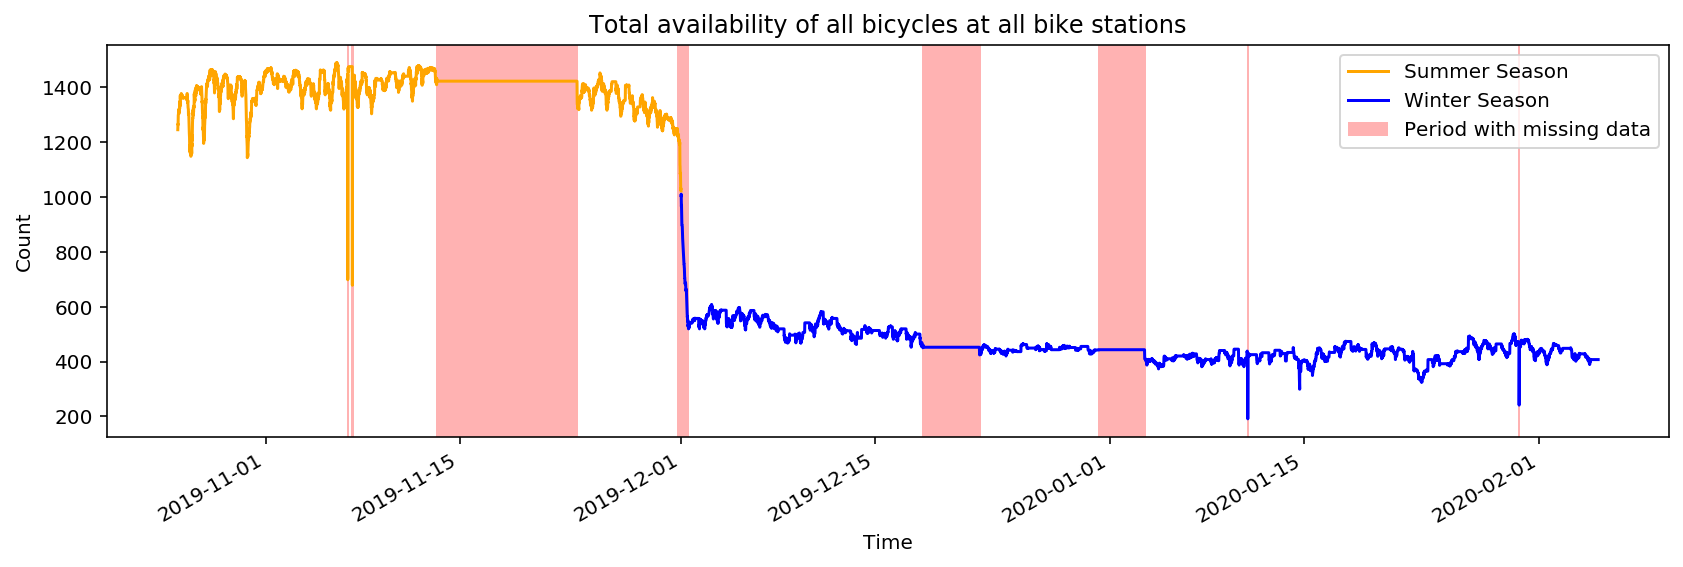

In [18]:
plt.figure(figsize=(14,4))
ax = df[ df['Summer Season'] == True ].sum(axis=1).plot(color='orange')
ax = df[ df['Summer Season'] == False ].sum(axis=1).plot(color='b')
#ax = df[ df['Delete'] == True ].sum(axis=1).plot(color='r')

# plot
for period in missing_data_periods:
    period_start = datetime.strptime(period[0], '%Y-%m-%d %H:%M:%S') - timedelta(hours=2)
    period_end   = datetime.strptime(period[1], '%Y-%m-%d %H:%M:%S') + timedelta(hours=2)
    plt.axvspan(period_start, period_end, facecolor='r', alpha=0.3)

ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend(['Summer Season', 'Winter Season', 'Period with missing data']);

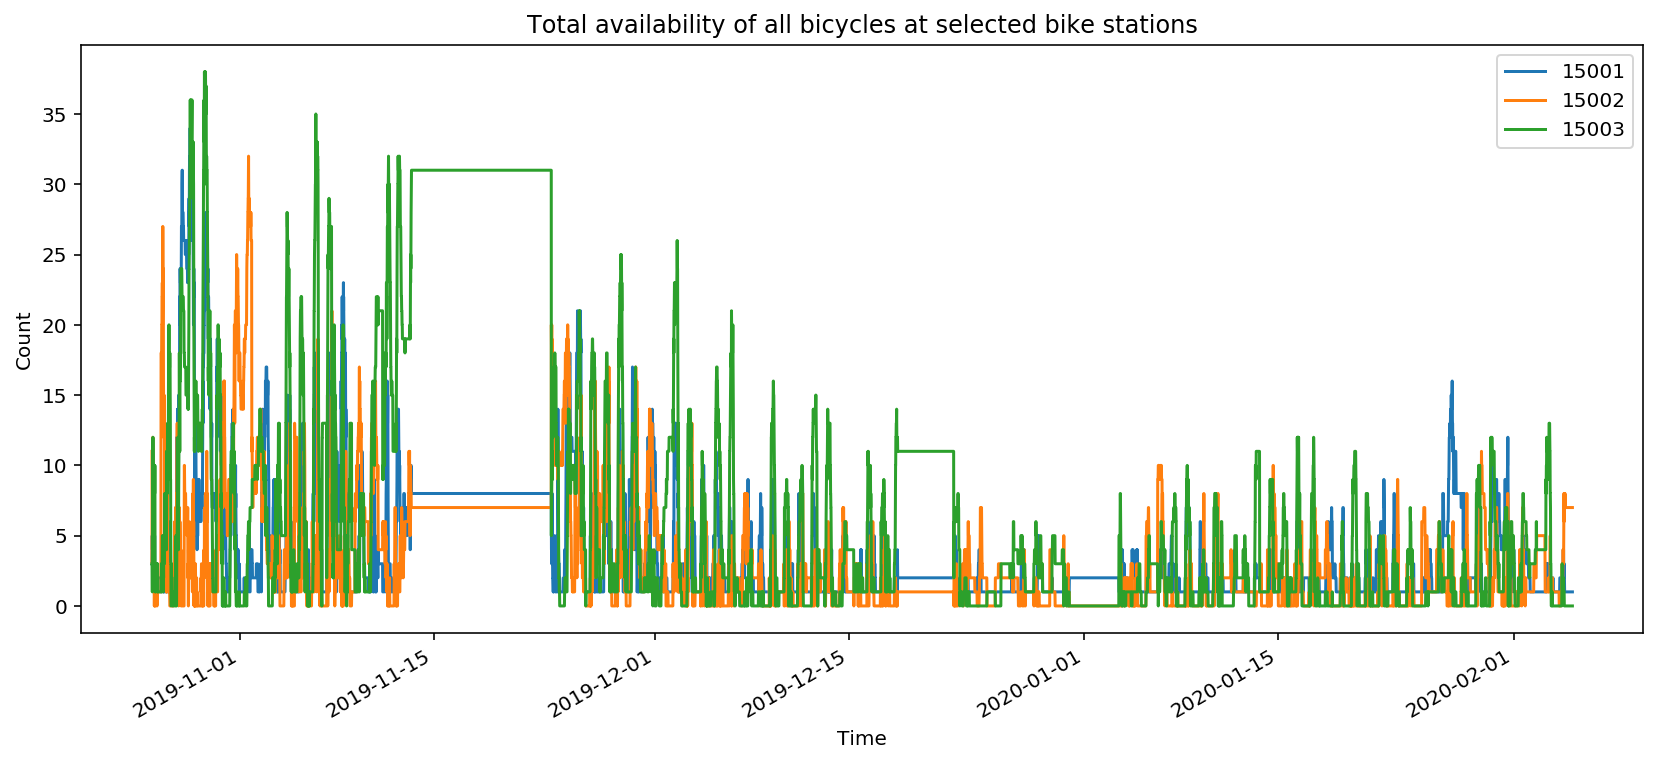

In [19]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

In [20]:
# start = datetime.strptime('2020-01-30 12:00:00', '%Y-%m-%d %H:%M:%S')
# end = start + timedelta(hours=2)

# for index, value in df[ (df.index >= start) & (df.index <= end) ].sum(axis=1).items():
#     print(index, value)